# 603 Figure 3

Fair shares assessment.

In [1]:
import pyam
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.transforms as mtransforms

from pathlib import Path

<IPython.core.display.Javascript object>

Step 1: Read in the necessary datafiles.

In [2]:
df = pd.read_csv(
    Path(
        '../data/figure3b.csv'
    ),
    index_col=[0,1,2]
)

In [3]:
percapita = pd.read_csv(
    Path(
        '../data/figure3a.csv'
    ),
    index_col=[0,1,2]
)

Step 2: Make a mapping dictionary from R10 names to the region labels.

In [4]:
region_renaming = {
    'R10AFRICA': 'Africa',
    'R10CHINA+': 'Eastern\nAsia',
    'R10EUROPE': 'Europe',
    'R10INDIA+': 'Southern\nAsia',
    'R10LATIN_AM':'Latin\nAmerica',
    'R10MIDDLE_EAST':'Middle\nEast',
    'R10NORTH_AM':'North\nAmerica',
    'R10PAC_OECD':'Australia, Japan,\nNew Zealand',
    'R10REF_ECON':'Eastern Europe\nand West-Central Asia',
    'R10REST_ASIA':'South-East Asia\nand Pacific'
}

Step 3: Determine the color schemes we want to apply.

In [5]:
scenario_marker = {
    'SusDev_SDP-PkBudg1000':'o',
    'CEMICS_SSP1-1p5C-minCDR':'^',
    'CEMICS_SSP2-1p5C-minCDR':'^',
    'CEMICS_SSP1-1p5C-fullCDR':'s',
    'CEMICS_SSP2-1p5C-fullCDR':'s'
}

In [6]:
ssp1_type = ['SusDev_SDP-PkBudg1000', 'CEMICS_SSP1-1p5C-minCDR', 'CEMICS_SSP1-1p5C-fullCDR']
ssp2_type = ['CEMICS_SSP2-1p5C-minCDR', 'CEMICS_SSP2-1p5C-fullCDR']

Step 4: Plot the figure.

In [7]:
region_order = [
    'R10NORTH_AM', 'R10EUROPE','R10REF_ECON', 'R10PAC_OECD', 'R10CHINA+',
    'R10INDIA+', 'R10LATIN_AM', 'R10MIDDLE_EAST', 'R10REST_ASIA',
    'R10AFRICA'
]

In [8]:
plt.rcParams.update({'font.size': 14})

/var/folders/yw/qzffs_jd1l3b0w2tk4cdqxj00000gn/T/ipykernel_2914/213987100.py:201: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


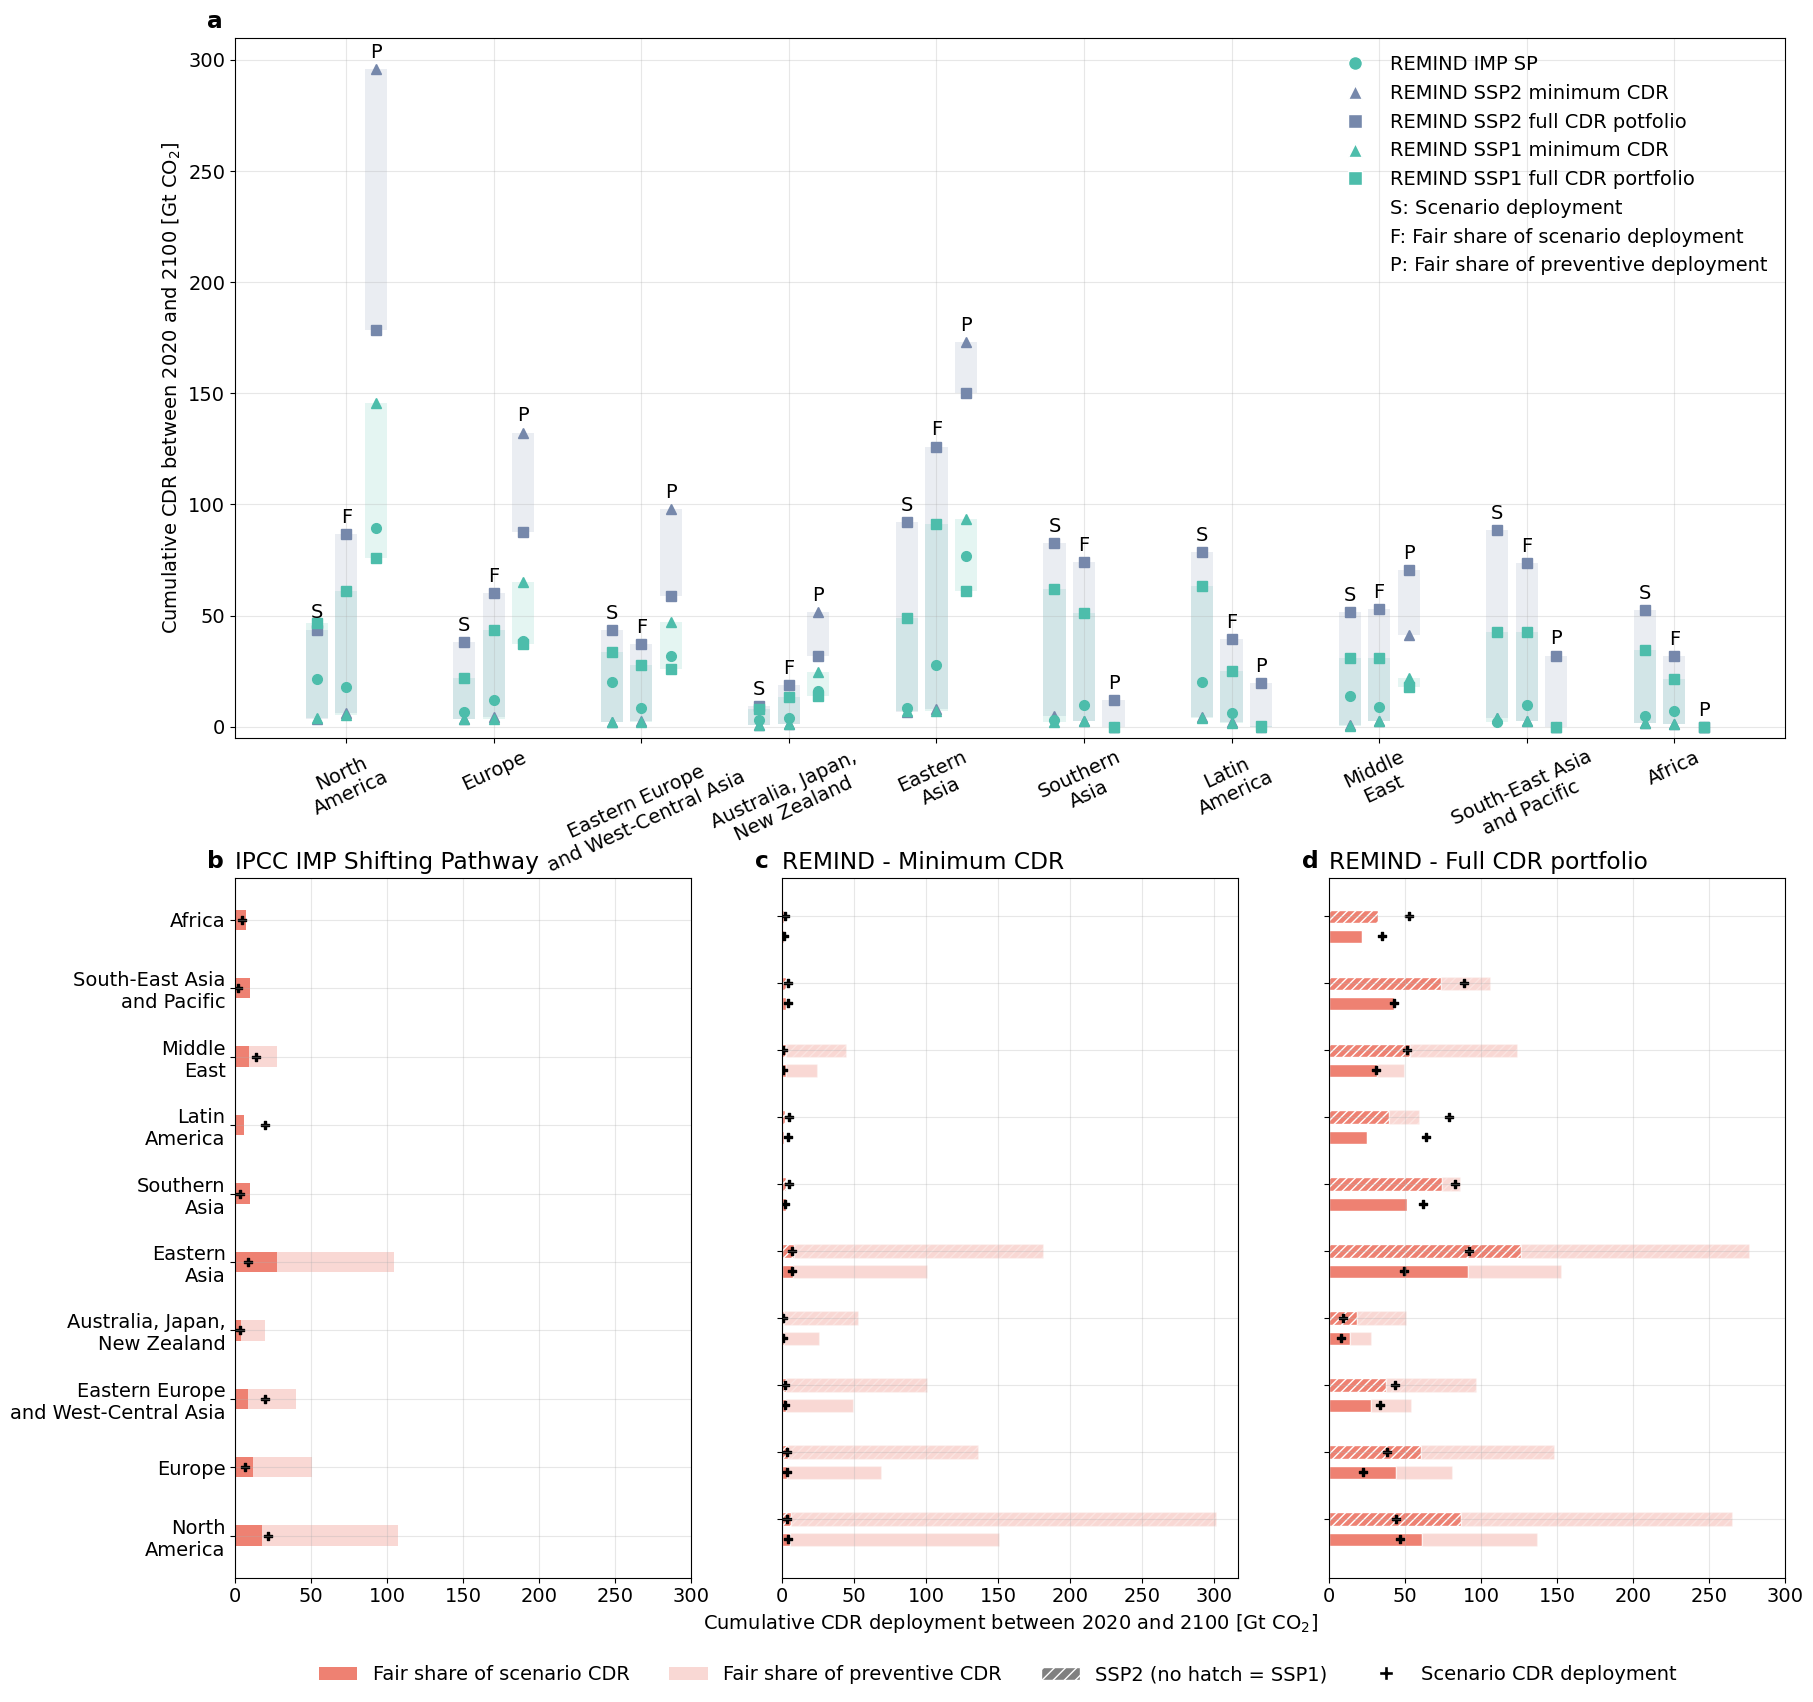

In [9]:
fig, ax = plt.subplot_mosaic(
    [
        ['a', 'a', 'a'],
        ['b', 'c', 'd']
    ], 
    figsize=(20,20)
)

labels = []
# Go through each region
annot = ['S','F','P']
for i, region in enumerate(region_order):
    reg = df.loc[pd.IndexSlice[:, :, region], :]
    for j, col in enumerate(['Carbon Dioxide Removal|NovelCmltv', 'Carbon Dioxide Removal|Novel|FairShare', 'Carbon Dioxide Removal|Novel [p90]|Additional|FairShare']):
        loc = i - 0.2 + (j * 0.2)
        ssp1_data = reg.loc[pd.IndexSlice[:, ssp1_type, :], col]
        ssp2_data = reg.loc[pd.IndexSlice[:, ssp2_type, :], col]
        ax['a'].bar(
            x=loc,
            bottom=ssp2_data.min(),
            height=ssp2_data.max()-ssp2_data.min(),
            color='#7688ab',
            alpha=0.15,
            width=0.15
        )
        ax['a'].text(
            loc,
            ssp2_data.max()+5,
            annot[j],
            ha='center'
        )
        for scen in ssp2_type:
            ax['a'].plot(
                loc,
                ssp2_data.loc[pd.IndexSlice[:, scen, :]],
                marker=scenario_marker[scen],
                color='#7688ab',
                markersize=7
            )
        ax['a'].bar(
            x=loc,
            bottom=ssp1_data.min(),
            height=ssp1_data.max()-ssp1_data.min(),
            color='#4dbdab',
            alpha=0.15,
            width=0.15
        )
        for scen in ssp1_type:
            ax['a'].plot(
                loc,
                ssp1_data.loc[pd.IndexSlice[:, scen, :]],
                marker=scenario_marker[scen],
                color='#4dbdab',
                markersize=7
            )
    labels.append(region_renaming[region])
# Grid
ax['a'].grid(alpha=0.2)
ax['a'].set_ylim(-5, 310)
ax['a'].set_xticks(range(10))
ax['a'].set_xticklabels(labels, rotation=25)
ax['a'].set_ylabel(
    'Cumulative CDR between 2020 and 2100 [Gt CO$_2$]'
)
# Panel B - SDP
for i, region in enumerate(region_order):
    data = df.loc[pd.IndexSlice[:, 'SusDev_SDP-PkBudg1000', region], :]
    ax['b'].barh(
        y=i,
        height=0.3,
        left=0,
        width=data['Carbon Dioxide Removal|Novel|FairShare'],
        color='#ee8172'
    )
    ax['b'].barh(
        y=i,
        height=0.3,
        left=data['Carbon Dioxide Removal|Novel|FairShare'],
        width=data['Carbon Dioxide Removal|Novel [p90]|Additional|FairShare'],
        color='#ee8172',
        alpha=0.3
    )
    ax['b'].scatter(
        y=i,
        x=data['Carbon Dioxide Removal|NovelCmltv'],
        marker='P',
        color='black'
    )
ax['b'].set_xlim(0, 300)

# Panel c - minimum CDR
for i, region in enumerate(region_order):
    for j, scen in enumerate(['CEMICS_SSP1-1p5C-minCDR', 'CEMICS_SSP2-1p5C-minCDR']):
        loc = i - 0.3 + (j * 0.3)
        if j == 1:
            hatch='////'
        else:
            hatch=None
        data = df.loc[pd.IndexSlice[:, scen, region], :]
        ax['c'].barh(
            y=loc,
            height=0.2,
            left=0,
            width=data['Carbon Dioxide Removal|Novel|FairShare'],
            color='#ee8172',
            hatch=hatch,
            edgecolor='white'
        )
        ax['c'].barh(
            y=loc,
            height=0.2,
            left=data['Carbon Dioxide Removal|Novel|FairShare'],
            width=data['Carbon Dioxide Removal|Novel [p90]|Additional|FairShare'],
            color='#ee8172',
            alpha=0.3,
            hatch=hatch,
            edgecolor='white'
        )
        ax['c'].scatter(
            y=loc,
            x=data['Carbon Dioxide Removal|NovelCmltv'],
            marker='P',
            color='black'
        )

for i, region in enumerate(region_order):
    for j, scen in enumerate(['CEMICS_SSP1-1p5C-fullCDR', 'CEMICS_SSP2-1p5C-fullCDR']):
        loc = i - 0.3 + (j * 0.3)
        data = df.loc[pd.IndexSlice[:, scen, region], :]
        if j == 1:
            hatch='////'
        else:
            hatch=None
        ax['d'].barh(
            y=loc,
            height=0.2,
            left=0,
            width=data['Carbon Dioxide Removal|Novel|FairShare'],
            color='#ee8172',
            hatch=hatch,
            edgecolor='white'
        )
        ax['d'].barh(
            y=loc,
            height=0.2,
            left=data['Carbon Dioxide Removal|Novel|FairShare'],
            width=data['Carbon Dioxide Removal|Novel [p90]|Additional|FairShare'],
            color='#ee8172',
            alpha=0.3,
            hatch=hatch,
            edgecolor='white'
        )
        ax['d'].scatter(
            y=loc,
            x=data['Carbon Dioxide Removal|NovelCmltv'],
            marker='P',
            color='black'
        )
ax['d'].set_xlim(0, 300)
ax['b'].set_yticks(range(10))
ax['b'].set_yticklabels(labels)
ax['c'].set_yticks(range(10))
ax['c'].set_yticklabels('')
ax['d'].set_yticks(range(10))
ax['d'].set_yticklabels('')
ax['b'].set_title('IPCC IMP Shifting Pathway', loc='left')
ax['c'].set_title('REMIND - Minimum CDR', loc='left')
ax['d'].set_title('REMIND - Full CDR portfolio', loc='left')

# add the subplot annotations
for label, a in ax.items():
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    a.text(0.0, 1.0, label, transform=a.transAxes + trans, weight='bold', fontsize='large')
    a.grid(alpha=0.3)

legend_panel_a = [
    Line2D([0], [0], color='w', marker='o', markerfacecolor='#4dbdab', linestyle='None', markersize=10, label='REMIND IMP SP'),
    Line2D([0], [0], color='w', marker='^', linestyle='None', markerfacecolor='#7688ab', markersize=10, label='REMIND SSP2 minimum CDR'),
    Line2D([0], [0], color='w', marker='s', linestyle='None', markerfacecolor='#7688ab', markersize=10, label='REMIND SSP2 full CDR potfolio'),
    Line2D([0], [0], color='w', marker='^', linestyle='None', markerfacecolor='#4dbdab', markersize=10, label='REMIND SSP1 minimum CDR'),
    Line2D([0], [0], color='w', marker='s', linestyle='None', markerfacecolor='#4dbdab', markersize=10, label='REMIND SSP1 full CDR portfolio'),
    Line2D([0], [0], color='w', label='S: Scenario deployment'),
    Line2D([0], [0], color='w', label='F: Fair share of scenario deployment'),
    Line2D([0], [0], color='w', label='P: Fair share of preventive deployment'),
]
ax['a'].legend(handles=legend_panel_a, frameon=False)

legend_panel_b_d = [
    Patch(facecolor='#ee8172', label='Fair share of scenario CDR'),
    Patch(facecolor='#ee8172', alpha=0.3, label='Fair share of preventive CDR'),
    Patch(facecolor='grey', hatch='///', edgecolor='white', label='SSP2 (no hatch = SSP1)'),
    Line2D([0], [0], color='w', marker='P', markerfacecolor='black', linestyle='None', markersize=10, label='Scenario CDR deployment')
]
ax['c'].set_xlabel('Cumulative CDR deployment between 2020 and 2100 [Gt CO$_2$]')
ax['d'].legend(
    handles=legend_panel_b_d,
    bbox_to_anchor=(0.8, -0.1), ncol=4,
    frameon=False
)

fig.tight_layout()

In [10]:
fig.savefig(
    Path('../results/Figure3.png'),
    dpi=600,
    bbox_inches='tight'
)

Statements on the per-capita deployment.

In [15]:
percapita['total'] = percapita['Modelled'] + percapita['Preventative']

In [16]:
percapita

Category  \
Model                 Scenario                 Region                     
REMIND-MAgPIE 2.1-4.2 CEMICS_SSP1-1p5C-fullCDR R10AFRICA       1_PP1990   
                                               R10CHINA+       1_PP1990   
                                               R10EUROPE       1_PP1990   
                                               R10INDIA+       1_PP1990   
                                               R10LATIN_AM     1_PP1990   
                                               R10MIDDLE_EAST  1_PP1990   
                                               R10NORTH_AM     1_PP1990   
                                               R10PAC_OECD     1_PP1990   
                                               R10REF_ECON     1_PP1990   
                                               R10REST_ASIA    1_PP1990   
                      CEMICS_SSP1-1p5C-minCDR  R10AFRICA       1_PP1990   
                                               R10CHINA+       1_PP1990   
                                               R10EUROPE       1_PP1990   
                                               R10INDIA+       1_PP1990   
                                               R10LATIN_AM     1_PP1990   
                                               R10MIDDLE_EAST  1_PP1990   
                                               R10NORTH_AM     1_PP1990   
                                               R10PAC_OECD     1_PP1990   
                                               R10REF_ECON     1_PP1990   
                                               R10REST_ASIA    1_PP1990   
                      CEMICS_SSP2-1p5C-fullCDR R10AFRICA       1_PP1990   
                                               R10CHINA+       1_PP1990   
                                               R10EUROPE       1_PP1990   
                                               R10INDIA+       1_PP1990   
                                               R10LATIN_AM     1_PP1990   
                                               R10MIDDLE_EAST  1_PP1990   
                                               R10NORTH_AM     1_PP1990   
                                               R10PAC_OECD     1_PP1990   
                                               R10REF_ECON     1_PP1990   
                                               R10REST_ASIA    1_PP1990   
                      CEMICS_SSP2-1p5C-minCDR  R10AFRICA       1_PP1990   
                                               R10CHINA+       1_PP1990   
                                               R10EUROPE       1_PP1990   
                                               R10INDIA+       1_PP1990   
                                               R10LATIN_AM     1_PP1990   
                                               R10MIDDLE_EAST  1_PP1990   
                                               R10NORTH_AM     1_PP1990   
                                               R10PAC_OECD     1_PP1990   
                                               R10REF_ECON     1_PP1990   
                                               R10REST_ASIA    1_PP1990   
                      SusDev_SDP-PkBudg1000    R10AFRICA       1_PP1990   
                                               R10CHINA+       1_PP1990   
                                               R10EUROPE       1_PP1990   
                                               R10INDIA+       1_PP1990   
                                               R10LATIN_AM     1_PP1990   
                                               R10MIDDLE_EAST  1_PP1990   
                                               R10NORTH_AM     1_PP1990   
                                               R10PAC_OECD     1_PP1990   
                                               R10REF_ECON     1_PP1990   
                                               R10REST_ASIA    1_PP1990   

                                                               Carbon Dioxide Removal|NovelCmltv|PerCapita20202100  \
Model                 Scenario              

In [17]:
percap_for_statements = percapita.loc[
    pd.IndexSlice[
        :, 
        ['CEMICS_SSP2-1p5C-fullCDR', 'SusDev_SDP-PkBudg1000'], 
        ['R10NORTH_AM', 'R10CHINA+']
    ],
    'total'
].round(1)

In [18]:
percap_for_statements

Model                  Scenario                  Region     
REMIND-MAgPIE 2.1-4.2  CEMICS_SSP2-1p5C-fullCDR  R10NORTH_AM    13.0
                                                 R10CHINA+       3.4
                       SusDev_SDP-PkBudg1000     R10NORTH_AM     5.3
                                                 R10CHINA+       1.3
Name: total, dtype: float64